MOVIE RECOMMENDATION SYSTEM 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.shape

(4803, 20)

In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies = movies.merge(credits,on='title')

In [8]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew','release_date','popularity','runtime','vote_average','vote_count','revenue','budget']]

In [9]:
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [10]:
import ast

In [11]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [12]:
movies.dropna(inplace=True)


In [13]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [14]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [15]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [16]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [17]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [18]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [19]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [20]:
movies['crew'] = movies['crew'].apply(fetch_director)


In [21]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
909,462,Erin Brockovich,A twice-divorced mother of three who sees an i...,[Drama],"[biography, based on true story, single mother...","[Julia Roberts, Albert Finney, Aaron Eckhart]",[Steven Soderbergh],2000-03-17,30.347332,131.0,7.1,716,256271286,52000000
2604,97430,The Man with the Iron Fists,"In feudal China, a blacksmith who makes weapon...",[Action],"[blacksmith, brothel, femme fatale, violence, ...","[Russell Crowe, Lucy Liu, Jamie Chung]",[RZA],2012-11-02,17.672021,96.0,5.2,358,15608545,15000000
1637,11702,The Replacement Killers,Hired assassin John Lee is asked by Chinatown ...,"[Action, Drama, Crime, Thriller]","[usa, china, assault rifle, sniper, chinatown,...","[Chow Yun-fat, Mira Sorvino, Michael Rooker]",[Antoine Fuqua],1998-02-06,9.607391,87.0,6.0,127,19204929,30000000
1845,175555,A Madea Christmas,Madea dispenses her unique form of holiday spi...,"[Comedy, Drama]",[christmas],"[Tyler Perry, Anna Maria Horsford, Tika Sumpter]",[Tyler Perry],2013-12-13,5.377155,100.0,7.0,35,0,0
1250,10718,Torque,Biker Cary Ford is framed by an old rival and ...,[Action],"[ex-girlfriend, drug dealer, gang, motorcyclist]","[Martin Henderson, Ice Cube, Monet Mazur]",[Joseph Kahn],2004-01-16,7.360793,84.0,4.7,119,46546197,40000000


In [22]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [23]:
movies.drop(columns=['overview'],inplace=True)

In [24]:
movies.to_csv('power_bi_movies_dataset.csv',index=True)

In [25]:
movies.head()

,movie_id,title,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [26]:
import pandas as pd
import ast  # To convert string representation of list into actual list

# Function to expand a list column into separate rows
def expand_list_column(df, column_name, new_column_name):
    df = df[['movie_id', 'title', column_name]].copy()  # Keep only relevant columns
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    df_exploded = df.explode(column_name)  # Split list values into multiple rows
    df_exploded = df_exploded.rename(columns={column_name: new_column_name})
    return df_exploded

# Expand and save Genres
df_genres = expand_list_column(movies, 'genres', 'genre')
df_genres.to_csv('movies_genres.csv', index=False)

# Expand and save Keywords
df_keywords = expand_list_column(movies, 'keywords', 'keyword')
df_keywords.to_csv('movies_keywords.csv', index=False)

# Expand and save Cast (Actors)
df_cast = expand_list_column(movies, 'cast', 'actor')
df_cast.to_csv('movies_cast.csv', index=False)

print("✅ Data successfully transformed! Files saved as:")
print("- movies_genres.csv")
print("- movies_keywords.csv")
print("- movies_cast.csv")


✅ Data successfully transformed! Files saved as:
- movies_genres.csv
- movies_keywords.csv
- movies_cast.csv


In [27]:
def extract_director(df):
    df = df[['movie_id', 'title', 'crew']].copy()  # Keep only relevant columns
    df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    df['director'] = df['crew'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)  # Extract first (only) director
    df = df.drop(columns=['crew'])  # Remove the original crew column
    return df

# Apply function and save
df_directors = extract_director(movies)
df_directors.to_csv('movies_directors.csv', index=False)

In [28]:
movies.head()

,movie_id,title,genres,keywords,cast,crew,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [29]:
movies.drop(columns=['genres','keywords','cast','crew'],inplace=True)
movies.head()

,movie_id,title,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


In [30]:
movies.to_csv('power_bi_movies_dataset.csv',index=True)
movies.head()

,movie_id,title,release_date,popularity,runtime,vote_average,vote_count,revenue,budget
0,19995,Avatar,2009-12-10,150.437577,162.0,7.2,11800,2787965087,237000000
1,285,Pirates of the Caribbean: At World's End,2007-05-19,139.082615,169.0,6.9,4500,961000000,300000000
2,206647,Spectre,2015-10-26,107.376788,148.0,6.3,4466,880674609,245000000
3,49026,The Dark Knight Rises,2012-07-16,112.312950,165.0,7.6,9106,1084939099,250000000
4,49529,John Carter,2012-03-07,43.926995,132.0,6.1,2124,284139100,260000000


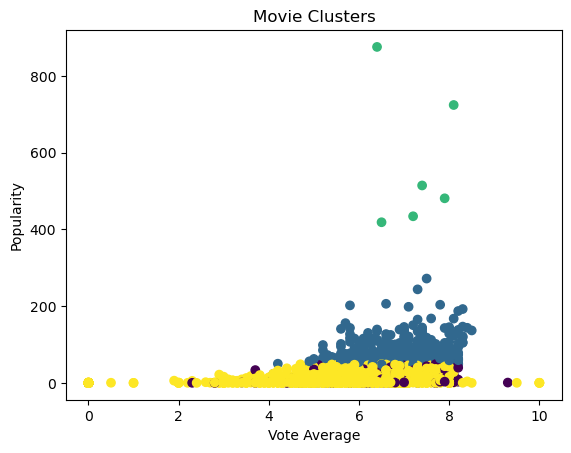

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
X = movies[['vote_average', 'popularity', 'runtime']]

# Train K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
movies['Cluster'] = kmeans.fit_predict(X)

# Save cluster results
movies.to_csv("movies_with_clusters.csv", index=False)

# Visualize clusters
plt.scatter(X['vote_average'], X['popularity'], c=movies['Cluster'], cmap='viridis')
plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.title("Movie Clusters")
plt.show()
